# NIE-ML Challenge 

## Predict the Publishing Material Type - Hackerearth Challenge

In [0]:
#Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [0]:
#Train and Test dataset
train = pd.read_csv('train_file.csv')
test = pd.read_csv('test_file.csv')

print('Train shape: {}'.format(train.shape))
print('Test shape: {}'.format(test.shape))

Train shape: (31653, 12)
Test shape: (21102, 11)


In [0]:
train.head()

,ID,UsageClass,CheckoutType,CheckoutYear,CheckoutMonth,Checkouts,Title,Creator,Subjects,Publisher,PublicationYear,MaterialType
0,1,Physical,Horizon,2005,4,1,Tidal wave,NaN,"Tsunamis, Tsunamis Juvenile literature",NaN,NaN,BOOK
1,2,Physical,Horizon,2005,4,1,London holiday / Richard Peck.,"Peck, Richard, 1934-",NaN,"Viking,",1998.,BOOK
2,3,Physical,Horizon,2005,4,3,Cinco de Mayo : celebrating Hispanic pride / C...,"Gnojewski, Carol",Cinco de Mayo Mexican holiday History Juvenile...,"Enslow Publishers,",c2002.,BOOK
3,4,Physical,Horizon,2005,4,1,Annapolis,NaN,"War stories, Historical fiction, Domestic fict...",NaN,NaN,BOOK
4,5,Physical,Horizon,2005,4,1,As a man thinketh,NaN,Thought and thinking,NaN,NaN,BOOK


In [0]:
train.describe()

,ID,CheckoutYear,CheckoutMonth,Checkouts
count,31653.000000,31653.0,31653.0,31653.000000
mean,15827.000000,2005.0,4.0,2.117430
std,9137.578372,0.0,0.0,2.629428
min,1.000000,2005.0,4.0,1.000000
25%,7914.000000,2005.0,4.0,1.000000
50%,15827.000000,2005.0,4.0,1.000000
75%,23740.000000,2005.0,4.0,2.000000
max,31653.000000,2005.0,4.0,85.000000


In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31653 entries, 0 to 31652
Data columns (total 12 columns):
ID                 31653 non-null int64
UsageClass         31653 non-null object
CheckoutType       31653 non-null object
CheckoutYear       31653 non-null int64
CheckoutMonth      31653 non-null int64
Checkouts          31653 non-null int64
Title              31653 non-null object
Creator            8516 non-null object
Subjects           29890 non-null object
Publisher          9737 non-null object
PublicationYear    9722 non-null object
MaterialType       31653 non-null object
dtypes: int64(4), object(8)
memory usage: 2.9+ MB


Above we can clearly see that there is lot of missing data, total there are 31653 data samples,
in Creator column there are only 8516 values out of 31653, are available
in Subjects column few of data is missing, we have 29890/31653 values
A lot of data from Publisher and PublicationYear is missing.

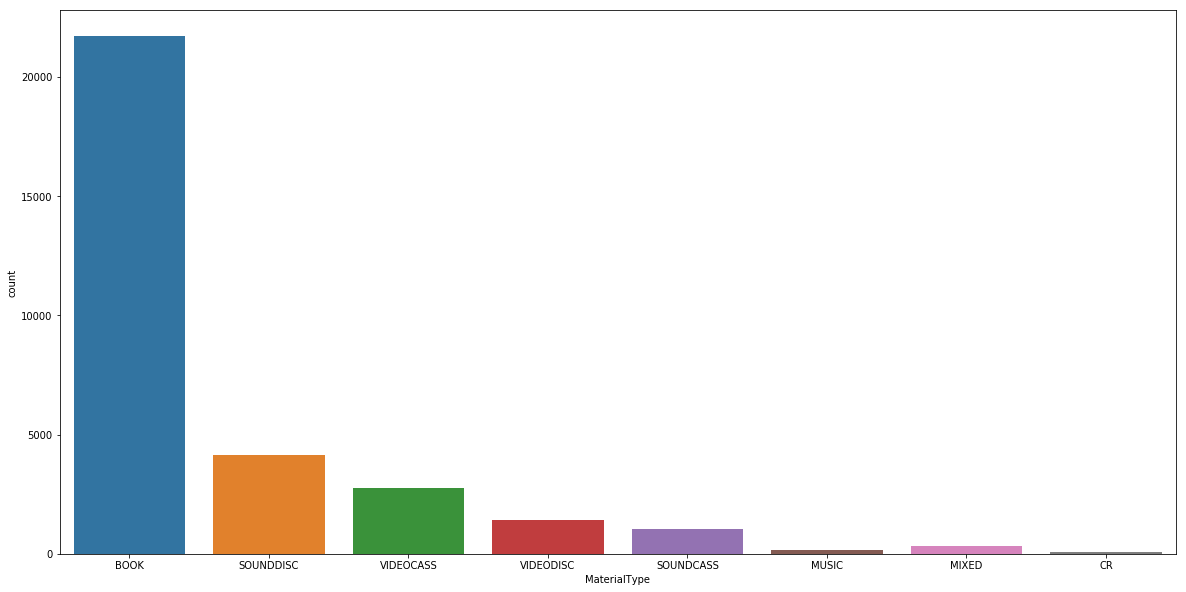

In [0]:
#Countplot of various MaterialType
plt.figure(figsize = (20, 10))
sns.countplot('MaterialType', data=train)
plt.show()

The above graph very well describes the frequency of MaterialTypes used,
We find that BOOK is the most prefered MaterialType.
SOUNDISC and VIDEOCASS are the next prefered types.
Rest MaterialTypes are very less likely to be prefered.

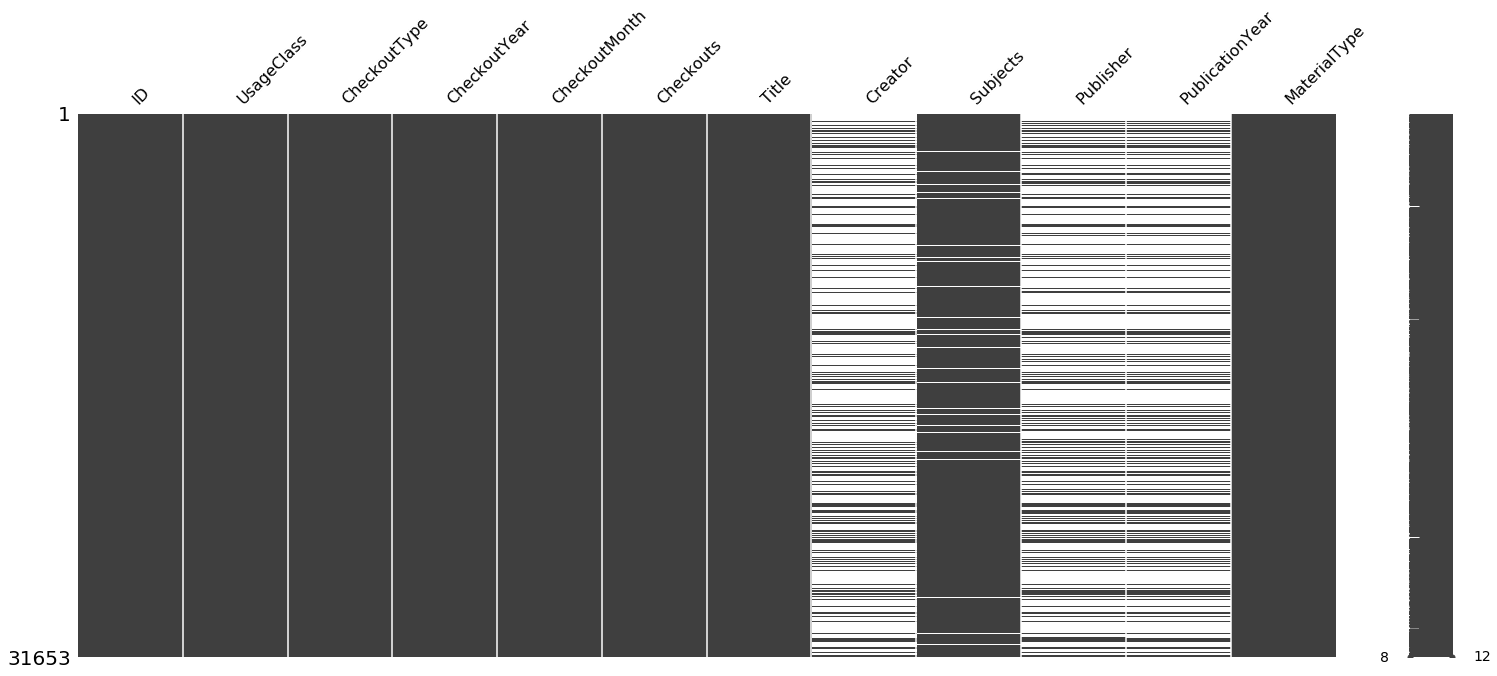

In [0]:
#Visualise missing data
missingno.matrix(train)
plt.show()

This missingno matrix very well describes overall absence of data in the dataset.
White lines represent missing values(NaN).

Now, firstly we require to preprocess the data, and remove unwanted feature columns which donot effect the MaterialType to be used like 'ID', 'Title' etc.
And since there is few data missing in Subjects column, we need to figure out some way to get frame values for missing data.
Below Cells are self explanatory for preprocessing process.

In [0]:
#Handeling missing values in Subjects Column
def fill_sub(col):
    subject = col[0]
    if 'Video' in str(subject):
        return 'video'
    elif 'video' in str(subject):
        return 'video'
    elif 'film' in str(subject):
        return 'video'
    elif 'music' in str(subject):
        return 'music'
    elif 'Music' in str(subject):
        return 'music'
    else:
        return 'book'

In [0]:
train['Subjects'] = train[['Subjects']].apply(fill_sub, axis=1)
train.head()

,ID,UsageClass,CheckoutType,CheckoutYear,CheckoutMonth,Checkouts,Title,Creator,Subjects,Publisher,PublicationYear,MaterialType
0,1,Physical,Horizon,2005,4,1,Tidal wave,NaN,book,NaN,NaN,BOOK
1,2,Physical,Horizon,2005,4,1,London holiday / Richard Peck.,"Peck, Richard, 1934-",book,"Viking,",1998.,BOOK
2,3,Physical,Horizon,2005,4,3,Cinco de Mayo : celebrating Hispanic pride / C...,"Gnojewski, Carol",book,"Enslow Publishers,",c2002.,BOOK
3,4,Physical,Horizon,2005,4,1,Annapolis,NaN,book,NaN,NaN,BOOK
4,5,Physical,Horizon,2005,4,1,As a man thinketh,NaN,book,NaN,NaN,BOOK


In [0]:
#Non dependency on these features, since they have same values for all data samples.
print(train['UsageClass'].unique())
print(train['CheckoutType'].unique())
print(train['CheckoutYear'].unique())
print(train['CheckoutMonth'].unique())

['Physical']
['Horizon']
[2005]
[4]


In [0]:
train.drop(['UsageClass', 'CheckoutType', 'CheckoutYear', 'CheckoutMonth'], axis=1, inplace=True)
train.drop(['Title', 'Creator', 'Publisher', 'PublicationYear'], axis=1, inplace=True)
train.head()

,ID,Checkouts,Subjects,MaterialType
0,1,1,book,BOOK
1,2,1,book,BOOK
2,3,3,book,BOOK
3,4,1,book,BOOK
4,5,1,book,BOOK


In [0]:
train.drop(['ID'], axis=1, inplace=True)

In [0]:
y_train = train['MaterialType']
y_train.head()

0    BOOK
1    BOOK
2    BOOK
3    BOOK
4    BOOK
Name: MaterialType, dtype: object

In [0]:
subject = pd.get_dummies(train['Subjects'])
subject.head()

,book,music,video
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [0]:
train.drop(['Subjects'], axis=1, inplace=True)
X_train = pd.concat([train, subject], axis=1)
X_train.drop(['MaterialType'], axis=1, inplace=True)
X_train.head()

,Checkouts,book,music,video
0,1,1,0,0
1,1,1,0,0
2,3,1,0,0
3,1,1,0,0
4,1,1,0,0


In [0]:
print(X_train.shape, y_train.shape)

(31653, 4) (31653,)


The Train Dataset has been succesfully preprocessed and is ready to be used for training a Classifier model.

Before creating our Machine Learning model, Lets preprocess our Test Dataset using same above steps.

In [0]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21102 entries, 0 to 21101
Data columns (total 11 columns):
ID                 21102 non-null int64
UsageClass         21102 non-null object
CheckoutType       21102 non-null object
CheckoutYear       21102 non-null int64
CheckoutMonth      21102 non-null int64
Checkouts          21102 non-null int64
Title              21102 non-null object
Creator            5998 non-null object
Subjects           19889 non-null object
Publisher          6875 non-null object
PublicationYear    6860 non-null object
dtypes: int64(4), object(7)
memory usage: 1.8+ MB


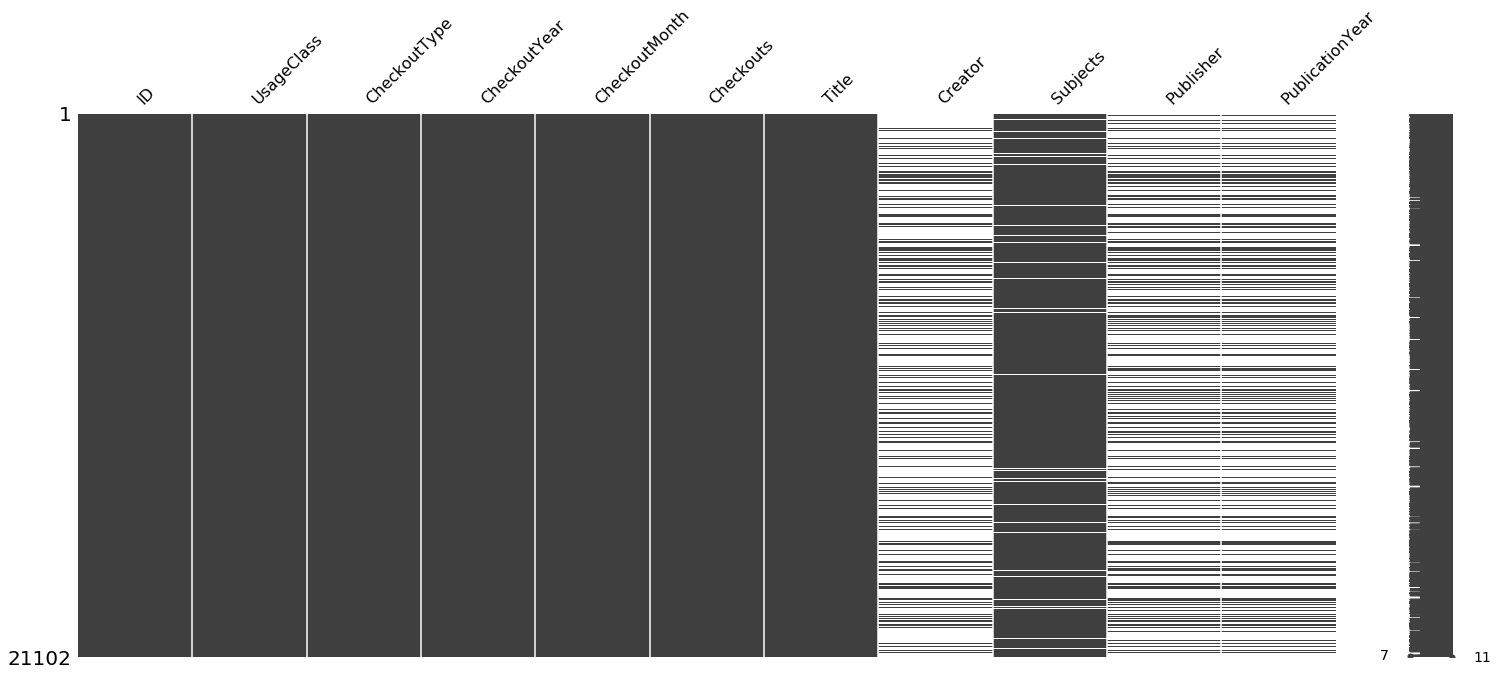

In [0]:
missingno.matrix(test)
plt.show()

In [0]:
test.drop(['UsageClass', 'CheckoutType', 'CheckoutYear', 'CheckoutMonth'], axis=1, inplace=True)
test.drop(['Title', 'Creator', 'Publisher', 'PublicationYear'], axis=1, inplace=True)
test.drop(['ID'], axis=1, inplace=True)

In [0]:
test['Subjects'] = test[['Subjects']].apply(fill_sub, axis=1)
subject_test = pd.get_dummies(test['Subjects'])
subject_test.head()

,book,music,video
0,1,0,0
1,0,0,1
2,0,1,0
3,1,0,0
4,1,0,0


In [0]:
test.drop(['Subjects'], axis=1, inplace=True)

In [0]:
X_test = pd.concat([test, subject_test], axis=1)
X_test.head()

,Checkouts,book,music,video
0,1,1,0,0
1,2,0,0,1
2,2,0,1,0
3,2,1,0,0
4,2,1,0,0


Our Test Dataset is now ready to be used for prediction.

Lets get the Labels for Test Dataset to be used later after prediction, for determining Accuracy Score of our model and other metrics.

In [0]:
y_test = pd.read_csv('results_file.csv')
y_test.head()

,ID,MaterialType
0,31654,BOOK
1,31655,VIDEOCASS
2,31656,SOUNDDISC
3,31657,BOOK
4,31658,VIDEOCASS


Save ID values to be used for our submission file.

In [0]:
ID = y_test['ID']
ID.head()

0    31654
1    31655
2    31656
3    31657
4    31658
Name: ID, dtype: int64

In [0]:
y_test.drop(['ID'], axis=1, inplace=True)
y_test.head()

,MaterialType
0,BOOK
1,VIDEOCASS
2,SOUNDDISC
3,BOOK
4,VIDEOCASS


Finally, Lets prepare our Machine Learning based Classifier models like LogisticRegression, SupportVectorMachine (SVM), KNN etc.

Lets use sklearn library for training various models using our Train Dataset and then make prediction for our Test Dataset.

In [0]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(X_train, y_train)

prediction1 = model1.predict(X_test)

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

print("LogisticRegresiion Accuracy: {}%".format(accuracy_score(y_test, prediction1)*100.0))
print("LogisticRegression f1_score: ", f1_score(y_test, prediction1, average='micro')

LogisticRegresiion Accuracy: 84.45644962562791%
LogisticRegression f1_score:  0.844564496256279


In [0]:
from sklearn.svm import SVC
model2 = SVC()
model2.fit(X_train, y_train)

prediction2 = model2.predict(X_test)
print("SVMClassifier Accuracy: {}%".format(accuracy_score(y_test, prediction2)*100.0))
print("SVMclassifier f1_score: ", f1_score(y_test, prediction2, average='micro'))

SVMClassifier Accuracy: 84.48488294948346%
SVMclassifier f1_score:  0.8448488294948346


In [0]:
#save results
result = pd.DataFrame({'ID': ID, 'MaterialType': prediction2})
result.to_csv('my_submission.csv', index=False)